In [1]:
import sys
import os
sys.path.append(os.environ["CODE_REPOSITORY"])
from code_repository.hotones.thetools import *
from code_repository.load.load_simulations import LoadSimulations

In [2]:
external = os.path.join("/media","jofrony", "2TB", "dardel","current_bgd2","population_unit", 
                        "distance_complete", "supercomputer", "networks")
repository = os.path.join("/home","jofrony","Documents",
                          "Repositories","current_bgd2",
                          "population_unit", 
                        "distance_complete", "supercomputer", "networks")

In [3]:
name = "synaptic_drive_DA"
folder = "ratio"

In [4]:
e = Experiments()
e.add_experiment(name="p1",
                 color="black",
                 label="2500 ms stimulation",
                 network="network-synapses.hdf5",
                 path=os.path.join(external, "pdc_network_2022-10-14"),
                 output="network_output_80mV_network-synapses_external-input-dardel-2023-02-03-14-40-15-p1.hdf5")


e.add_experiment(name="p1_DA",
                 color="red",
                 label="2500 ms stimulation",
                 network="network-synapses.hdf5",
                 path=os.path.join(external, "pdc_network_2022-10-14"),
                 output="network_output_80mV_network-synapses_external-input-dardel-2023-02-03-14-40-15-p1_dopamine_modulation_method_alpha_background_tstart_300_tonic_0.2_gmax_increase_0.8_tau_500.hdf5")



e.add_experiment(name="p1_p2",
                 color="black",
                 label="2500 ms stimulation",
                 network="network-synapses.hdf5",
                 path=os.path.join(external, "pdc_network_2022-10-14"),
                 output="network_output_80mV_network-synapses_external-input-dardel-2023-02-03-14-40-15-p1_p2.hdf5")


e.add_experiment(name="p1_p2_DA",
                 color="red",
                 label="2500 ms stimulation",
                 network="network-synapses.hdf5",
                 path=os.path.join(external, "pdc_network_2022-10-14"),
                 output="network_output_80mV_network-synapses_external-input-dardel-2023-02-03-14-40-15-p1_p2_dopamine_modulation_method_alpha_background_tstart_300_tonic_0.2_gmax_increase_0.8_tau_500.hdf5")

   
e.experiments     

{'p1': {'color': 'black',
  'label': '2500 ms stimulation',
  'network': 'network-synapses.hdf5',
  'path': '/media/jofrony/2TB/dardel/current_bgd2/population_unit/distance_complete/supercomputer/networks/pdc_network_2022-10-14',
  'output': 'network_output_80mV_network-synapses_external-input-dardel-2023-02-03-14-40-15-p1.hdf5'},
 'p1_DA': {'color': 'red',
  'label': '2500 ms stimulation',
  'network': 'network-synapses.hdf5',
  'path': '/media/jofrony/2TB/dardel/current_bgd2/population_unit/distance_complete/supercomputer/networks/pdc_network_2022-10-14',
  'output': 'network_output_80mV_network-synapses_external-input-dardel-2023-02-03-14-40-15-p1_dopamine_modulation_method_alpha_background_tstart_300_tonic_0.2_gmax_increase_0.8_tau_500.hdf5'},
 'p1_p2': {'color': 'black',
  'label': '2500 ms stimulation',
  'network': 'network-synapses.hdf5',
  'path': '/media/jofrony/2TB/dardel/current_bgd2/population_unit/distance_complete/supercomputer/networks/pdc_network_2022-10-14',
  'output

In [5]:
%%time
neuron_type = "dSPN"
sl = LoadSimulations(experiments=e)
sl.load_network_file(load_synapses=False)

specific_trace_ids = sl.get_population_units(neuron_type=neuron_type, population_unit=1)
spiking_analysis_dict_dspn = spiking_analysis(data_obj=sl, neuron_type=neuron_type, trace_ids=specific_trace_ids)


Loading 40000 neurons with 35040256 synapses and 2531 gap junctions
Loading /media/jofrony/2TB/dardel/current_bgd2/population_unit/distance_complete/supercomputer/networks/pdc_network_2022-10-14/simulation/network_output_80mV_network-synapses_external-input-dardel-2023-02-03-14-40-15-p1.hdf5
Loading 40000 neurons with 35040256 synapses and 2531 gap junctions
Loading /media/jofrony/2TB/dardel/current_bgd2/population_unit/distance_complete/supercomputer/networks/pdc_network_2022-10-14/simulation/network_output_80mV_network-synapses_external-input-dardel-2023-02-03-14-40-15-p1_dopamine_modulation_method_alpha_background_tstart_300_tonic_0.2_gmax_increase_0.8_tau_500.hdf5
Loading 40000 neurons with 35040256 synapses and 2531 gap junctions
Loading /media/jofrony/2TB/dardel/current_bgd2/population_unit/distance_complete/supercomputer/networks/pdc_network_2022-10-14/simulation/network_output_80mV_network-synapses_external-input-dardel-2023-02-03-14-40-15-p1_p2.hdf5
Loading 40000 neurons with 

In [6]:
len(specific_trace_ids['p1'])

1937

In [7]:
len(spiking_analysis_dict_dspn['p1']['spiking'])

1499

In [8]:
len(specific_trace_ids['p1_p2'])

1937

In [9]:
len(spiking_analysis_dict_dspn['p1_p2']['spiking'])

1352

In [10]:
import numpy as np
diff = np.setdiff1d(spiking_analysis_dict_dspn['p1']['spiking'],spiking_analysis_dict_dspn['p1_p2']['spiking'])

In [11]:
len(diff)

178

In [12]:
diff

array([ 1990,  2184,  2671,  3227,  3229,  3243,  3363,  3433,  4147,
        4213,  4395,  5001,  5503,  5541,  5555,  5887,  6110,  6234,
        6306,  6368,  6493,  6561,  6575,  6793,  6850,  7113,  7489,
        7564,  7569,  7576,  7582,  7755,  8202,  8203,  8249,  8319,
        8364,  8415,  9844,  9987, 10357, 10360, 10417, 10460, 10669,
       11041, 11327, 11428, 11589, 11683, 11854, 11924, 11980, 11984,
       12258, 12766, 12773, 12775, 13554, 13616, 13647, 13691, 13699,
       13898, 13977, 14018, 14029, 14061, 14133, 14210, 14321, 14392,
       14921, 14922, 14923, 14925, 15506, 15561, 15594, 16316, 16319,
       17520, 17578, 17668, 18646, 18704, 18718, 18719, 18789, 18913,
       18961, 18962, 18964, 18965, 19021, 19026, 19039, 19159, 19362,
       19511, 20131, 20636, 20638, 20639, 20676, 20706, 20761, 21285,
       21337, 21339, 21916, 21938, 22002, 22088, 22238, 22253, 22295,
       23631, 23651, 23695, 24713, 24714, 24724, 24873, 24878, 24896,
       25021, 25025,

In [13]:
p_dspn = calculate_ratio(dictionary=spiking_analysis_dict_dspn)
n_dspn = normalized_prp(dictionary=p_dspn, normalized="p1")

In [14]:
p_dspn

{'p1': {'spiking': 1.0, 'other': 1.0},
 'p1_DA': {'spiking': 1.1674449633088726, 'other': 0.42694063926940634},
 'p1_p2': {'spiking': 0.9019346230820547, 'other': 1.3356164383561644},
 'p1_p2_DA': {'spiking': 1.1147431621080721, 'other': 0.6073059360730594}}

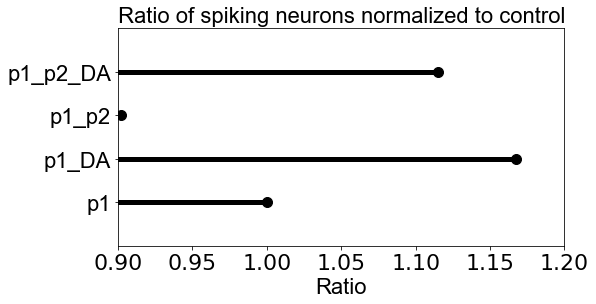

In [15]:
plot_ratio_normalized_spiking(ratio_dict=n_dspn, experiment_names=e, fig_name=neuron_type, folder=folder, save=True, min_ratio=0.9, max_ratio=1.2)

In [16]:
%%time
neuron_type = "iSPN"
sl = LoadSimulations(experiments=e)
sl.load_network_file(load_synapses=False)
specific_trace_ids = sl.get_population_units(neuron_type=neuron_type, population_unit=1)
spiking_analysis_dict_ispn = spiking_analysis(data_obj=sl, neuron_type=neuron_type, trace_ids=specific_trace_ids)

Loading 40000 neurons with 35040256 synapses and 2531 gap junctions
Loading /media/jofrony/2TB/dardel/current_bgd2/population_unit/distance_complete/supercomputer/networks/pdc_network_2022-10-14/simulation/network_output_80mV_network-synapses_external-input-dardel-2023-02-03-14-40-15-p1.hdf5
Loading 40000 neurons with 35040256 synapses and 2531 gap junctions
Loading /media/jofrony/2TB/dardel/current_bgd2/population_unit/distance_complete/supercomputer/networks/pdc_network_2022-10-14/simulation/network_output_80mV_network-synapses_external-input-dardel-2023-02-03-14-40-15-p1_dopamine_modulation_method_alpha_background_tstart_300_tonic_0.2_gmax_increase_0.8_tau_500.hdf5
Loading 40000 neurons with 35040256 synapses and 2531 gap junctions
Loading /media/jofrony/2TB/dardel/current_bgd2/population_unit/distance_complete/supercomputer/networks/pdc_network_2022-10-14/simulation/network_output_80mV_network-synapses_external-input-dardel-2023-02-03-14-40-15-p1_p2.hdf5
Loading 40000 neurons with 

In [17]:
p_ispn = calculate_ratio(dictionary=spiking_analysis_dict_ispn)
n_ispn = normalized_prp(dictionary=p_ispn, normalized="p1")

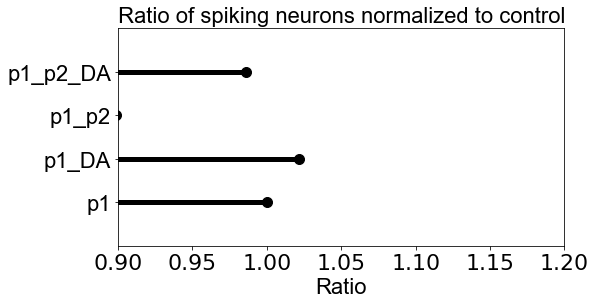

In [18]:
plot_ratio_normalized_spiking(ratio_dict=n_ispn, experiment_names=e, fig_name=neuron_type, folder=folder, save=True,min_ratio=0.9, max_ratio=1.2)

In [19]:
len(specific_trace_ids['p1'])

1936

In [20]:
len(spiking_analysis_dict_ispn['p1']['spiking'])

1739

In [21]:
len(specific_trace_ids['p1_p2'])

1936

In [22]:
len(spiking_analysis_dict_ispn['p1_p2']['spiking'])

1563

In [23]:
import numpy as np
diff = np.setdiff1d(spiking_analysis_dict_ispn['p1']['spiking'],spiking_analysis_dict_ispn['p1_p2']['spiking'])

In [24]:
len(diff)

185

In [25]:
diff

array([ 2200,  2685,  3393,  3394,  3457,  3460,  4266,  4299,  4355,
        4368,  4369,  4907,  4910,  4968,  5793,  5931,  6275,  6463,
        6534,  6538,  6827,  6871,  6873,  6887,  7611,  7664,  7782,
        7856,  8289,  8378,  8383,  8389,  8437,  8450,  8497, 10011,
       10015, 10233, 10288, 10429, 10443, 10500, 10502, 10555, 10579,
       10638, 10641, 10697, 10702, 11112, 11304, 11459, 11471, 11610,
       11616, 11701, 11761, 11874, 11896, 11962, 12150, 13655, 13670,
       13720, 13797, 13861, 13865, 13922, 14043, 14051, 14096, 14220,
       14228, 14234, 14236, 14293, 14365, 14368, 14369, 14371, 14475,
       14955, 15529, 15530, 15578, 15579, 15638, 15640, 15881, 15884,
       15944, 16043, 17364, 17369, 17424, 17491, 17603, 17606, 17611,
       17688, 18671, 18682, 18728, 18747, 18862, 18872, 18932, 18942,
       18981, 18992, 18994, 19002, 19048, 19056, 19062, 19132, 20588,
       20717, 21023, 21131, 21138, 21368, 21808, 22033, 22172, 22261,
       22324, 23730,